
This project aims to give students the freedom to choose how to approach this as Industry work is
quite open-ended when you are given full control over the Project methodology. For the summary
of outcomes, we would like readable Jupyter Notebooks summarising your key findings which can be
presented to clients and stakeholders.

• 5% for a readable Jupyter Notebook summarising the overall approach taken, issues that you
may have run into, and the limitations/assumptions you made along the way. As this is
open-ended, there is no right or wrong answer and we will assess you based on your overall
approach.


# Summary Notebook

This research aims to find an answer to three objectives:
1. Which suburbs have the highest predicted rent growth rate?
2. What are the most livable and afforable Victorian Suburbs?
3. What are the most important internal and external features in predicting rent growth?

There was a significant amount of work required to find possible answers to these three 'big questions', as will be described in this notebook. 

## Preliminary Work
Prior to any data manipulation and processing, our group first focused on finding literature which has previously handled the task of rent predictions in other areas of the world. Upon finding out the popularity of machine learning models such as the XGBoost Tree Regressor as well as the Neural Network model, we then considered the datasets we would like to apply to these models. 

After careful consideration, we chose to get our property data for Victorian Suburbs from Domain, a property listing website. We then went about gathering relevant external datasets, as well as creating scripts to scrape data from Domain. Further efforts led us to realising the possible significance in having data on a suburb's Income, Crime, Population and Public Transport statistics in predicting rental prices. 

At was at this stage we faced our first difficulty- it was very difficult to find certain datasets such as information on Parks and Entertainment within suburbs. It was hypothesised that entertainment areas such as these would have a positive impact on rent prices, however a lack of data led to us being unable to test this hypothesis. 

## Datasets and Preprocessing steps

Moving forward, we [preprocessed things] TODO- describe our preprocessing steps a bit more similar to the slides, and in a paragraph format

1. Used autocomplete in domain.com to get all the suburbs (web scraping)
2. Sent 22364 requests across a few days to scrape every property by suburb, in particular by generating and scraping the links
3. Download external datasets: crime, population and income from census, train station distances (## note: ischrone map)
4. Found the location coordinates of property data and used the geospatial suburb data to pinpoint the location of the property
5. Combined other datasets based on similar methods

In [1]:
from IPython.display import IFrame, Image


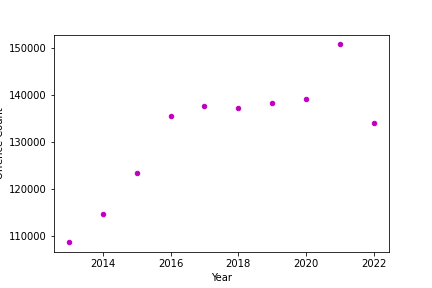

In [4]:
src2 = '../plots/crime_growth.png'
Image(filename=src2) 

In [5]:
src = '../plots/map_max_median_income.html'
IFrame(src=src, width=700, height=600)


In [6]:
src = '../plots/housing_demand.html'
IFrame(src=src, width=700, height=600)

In [7]:
src = '../plots/housing_demand.html'
IFrame(src=src, width=700, height=600)

In [8]:
src = '../plots/isochrome_trains.html'
IFrame(src=src, width=700, height=600)

## Assumptions

Due to the lack of historical property data, we assumed that with time, the rental prices of suburbs tend to shift towards that of expensive areas such as the CBD. This, of course, comes with the issue of our model not being able to correctly understand how the CBD itself should grow with time. In spite of this, due to the already expensive nature of the CBD's properties, it was believed this was a fair trade off, as the rent prices within the CBD shouldn't experience significant growth, and hence should not change the results of finding the highest growth suburbs. 

In order to perform a prediction, we also operated under the assumption that the growth in external factors such as income, population and crime, are intrinsically linked to the growth in rent prices. Though we only had a low correlation between these factors and the rent price, the combination of factors was hypothesised to have a strong enough impact on rent price that it would model growth well.

In addition, we also assumed that the growth of external features (crime, population, and income) is linear. This is slightly misaligned with the results of the crime model, as the growth was not exactly linear in later years, likely due to the impact of coronavirus or similar. This is an unfortunate flaw in the model, however there is no simple way to account for the impact of confounding factors over all of our external datasets. 



## Limitations


## Insights on modelling

1. What are the most important internal and external features in predicting rental prices?
feature analysis PCA
Spearman correlation

Internal

The housing location (suburbs, distance to CBD)
Number of bedrooms, baths, and park (area in general)

External

Distance to train stations
Income, crime, etc need to look at the plots

2. What are the top 10 suburbs with the highest predicted growth rate?
Need to follow up with Ash on trees

3. What are the most liveable and affordable suburbs according to your chosen metrics?
Look for suburbs that has low crime rate, high income, low rent price, ideally closer to CBD and train stations that are well-spaced
Might want to standardise by dividing income with rent price

## Prediction
Made linear models for each external dataset (crime, income, and population). We chose this model because we assume that the growth of all these features are approximately linear.

Using data from previous years, predict growth rates and expected values of these statistics for each suburb in 2023, 2024, and 2025.
Using these predictions, we can then input it into the rental data model to see which suburb has the greatest growth rates in terms of rental cost. This operates under the assumption that external dataset growth will give us a good indication on the rental price growth. We found that all features (crime, income, population) increase in the future, unsurprisingly.

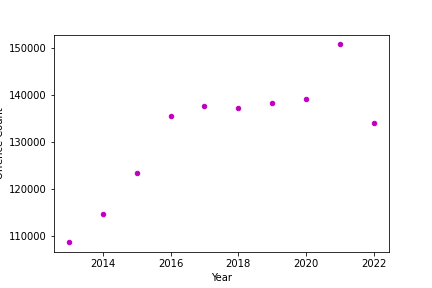

In [13]:
src = '../plots/crime_growth.png'
Image(filename=src)

For the crime data, the year 2022 is removed from the predictor variables because 2022 is not finished yet, and thus the data is giving us lower 2022 values than the values from any other year.

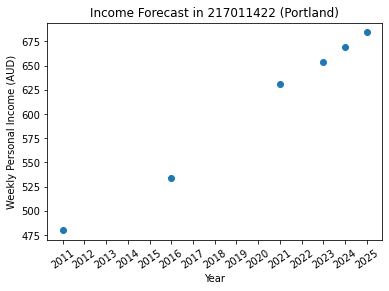

In [14]:
src = '../plots/lm_forecast_example_217011422.png'
Image(filename=src)

Additionally, since there are many suburbs with missing data, we find that many of our predictions need to be extrapolated by using the mean of our known prediction for each future year. A better method in data imputation can maybe be done, such as by considering other factors (e.g., suburbs with higher areas might correlate with higher population), but we decided to impute them with the means due to the time limitation that we have.

## Correlation Analysis

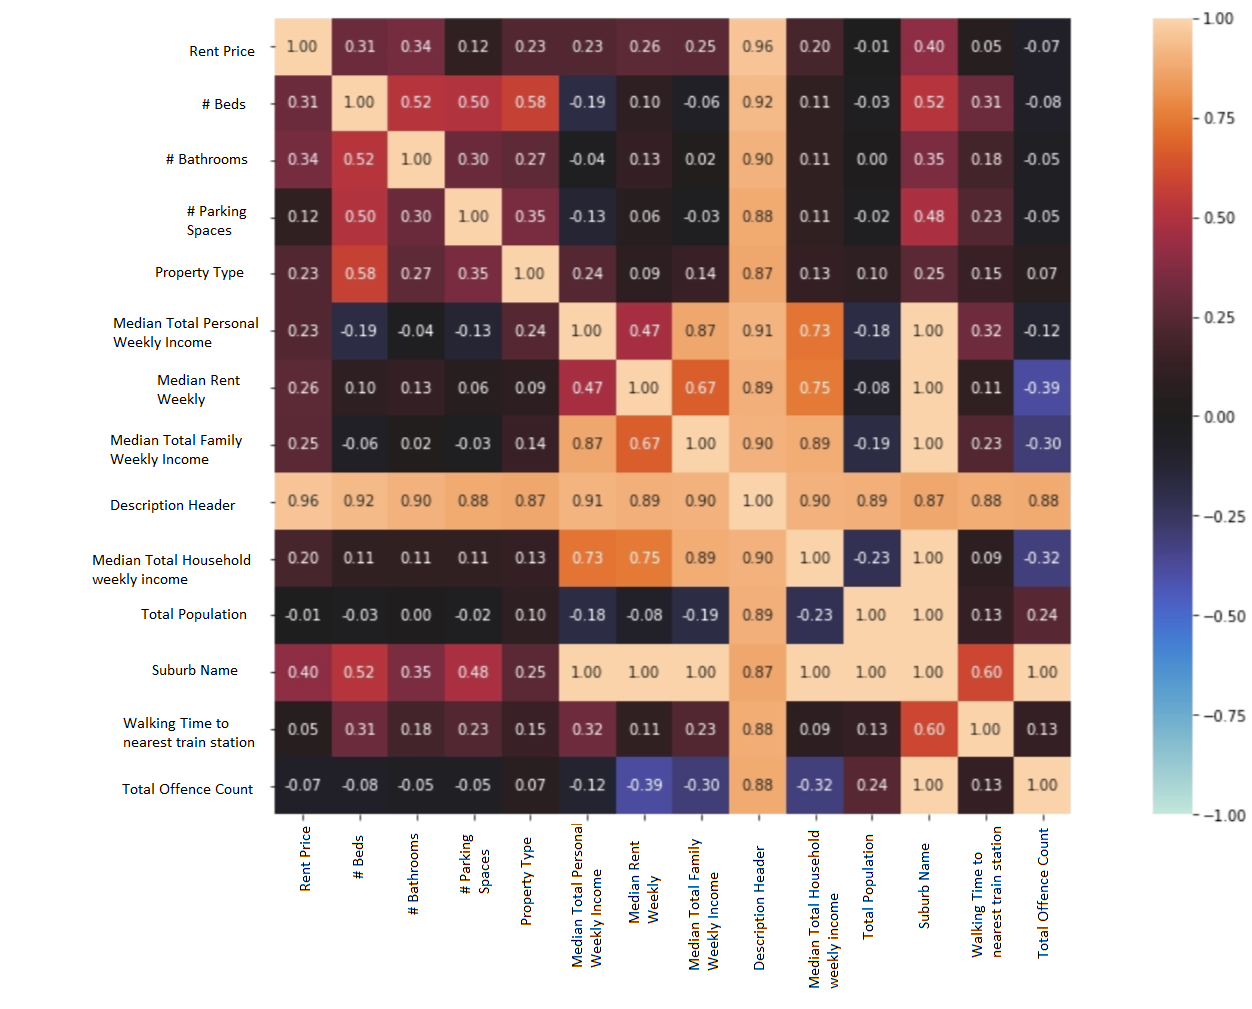

In [2]:
src = '../plots/correlations.png'
Image(filename=src) 

## Modelling

1. Neural Network - Multi layer perceptron
Low accuracy on the overall dataset (R^2 = 0.31).
When suburbs were divided into groups based on distance to CBD, and NN was trained on each of these groups, R^2 increased to 0.51.
Additional feature was created for this, which is the distance between suburb and CBD. The data was also stratified for testing, and grid search was used to find optimal parameters.

2. Tree
Used an XGBoost tree to model all features and tie them into rent prices by suburb. We ended up with a lower R^2 (0.28).


Both tree and neural network automatically perform feature selections. Our finding is that xgboost is not the ideal model, and so it was used to inform us that it may be better to rely on neural network predictions. 

While there are a lot of property data, the number of properties per suburb ends up being quite low since there are many subrubs in Victoria. This explains why NN does not work well when stratified. When we divide these into four rings based on distance to CBD instead of suburbs, we get much better performance. However, this diminishes our ability to predict which suburb grows the most.

for each suburb, we find the average house (average number of beds, baths, etc and round it to nearest int), and from the average house we can make predictions for the price for 2022. Once we have those predictions, we can predict on the average house again with the same number of average beds, baths. And using the crime, income, population data predictions by suburb, this will give us a second value for rent for 2023. Since we have two numbers, we can calculate the growth rate for 2024 and 2025.